# Смещения бутстреп-оценок для медианы

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def bootstrap_median(data, n_samples=5_000):
    """
    Calculate the bootstrap median of a dataset.

    Parameters
    ----------
    data : array_like
        The dataset to calculate the bootstrap median for.
    n_samples : int, optional
        The number of bootstrap samples to calculate. Default is 1000.

    Returns
    -------
    median : float
        The bootstrap median of the dataset.
    """
    # Calculate the bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(n_samples, len(data)))

    # Calculate the median of each bootstrap sample
    bootstrap_medians = np.median(bootstrap_samples, axis=1)

    # Calculate the bias-corrected bootstrap median
    bias_corrected_bootstrap_median = np.mean(bootstrap_medians)

    return bias_corrected_bootstrap_median

In [4]:
# Считаю смещение для выборки 2 тыс и 20 тыс.
# Делаю бутстрепирование 1000 раз

biases_2 = []
biases_20 = []
for i in tqdm(range(1000)):
    data_2 = np.random.normal(loc=1, scale=1, size=2_000)
    data_20 = np.random.normal(loc=1, scale=1, size=20_000)
    biases_2.append(bootstrap_median(data_2))
    biases_20.append(bootstrap_median(data_20))

100%|██████████| 1000/1000 [57:28<00:00,  3.45s/it]


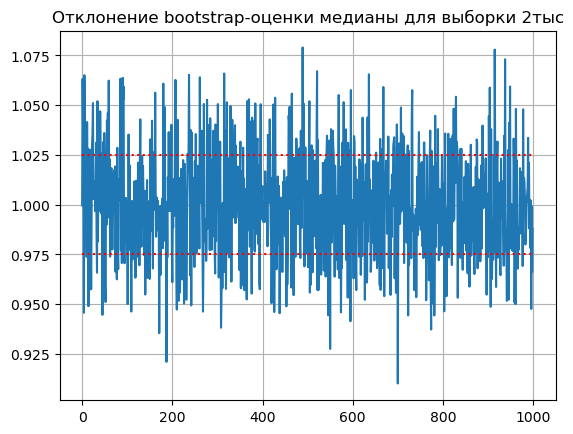

In [5]:
plt.plot(biases_2)
plt.hlines(y=1+0.025, xmin=0, xmax=1000, color='r', linestyles=':')
plt.hlines(y=1-0.025, xmin=0, xmax=1000, color='r', linestyles=':')
plt.title('Отклонение bootstrap-оценки медианы для выборки 2тыс')
plt.grid()
plt.show()

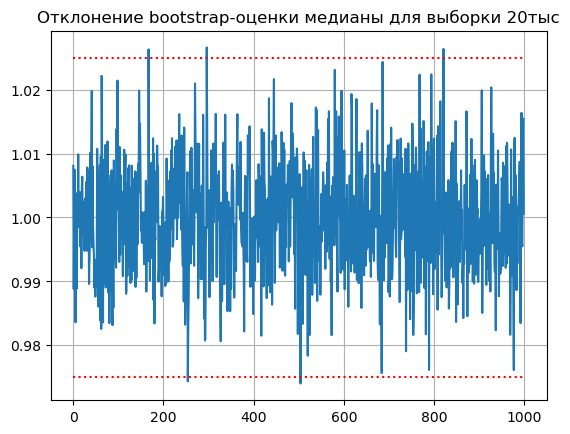

In [6]:
plt.plot(biases_20)
plt.hlines(y=1+0.025, xmin=0, xmax=1000, color='r', linestyles=':')
plt.hlines(y=1-0.025, xmin=0, xmax=1000, color='r', linestyles=':')
plt.title('Отклонение bootstrap-оценки медианы для выборки 20тыс')
plt.grid()
plt.show()

## Выводы:

1. Бутстреп-оценка может быть сильно смещенной (2,5% и более)
2. Но вероятность сильных смещений снижается по мере роста размера исходного датасета. В примере выше увеличение датасета с 2 тыс до 20 тыс. заметно сократило размер смещений.